In [3]:
import random
import sklearn
import sklearn.datasets 
import sklearn.svm as svm
import numpy as np
from matplotlib import pyplot as plt

# Tell matplotlib to show the plots within the notebook.
%matplotlib inline

Welcome to the second part of Assignment 1. Please remember that there is another Notebook together with this :) 

In this Notebook we will start by downloading a small digits dataset and visualizing some samples. Afterwards, we will learn how to split our data to train-validation-test splits in order to train a linear classifier. Don't worry, we will use existing library for training the classifier. Our focus is mainly on splitting the data and being able to process the output of a classifier. 

You will learn how to convert raw outputs to predictions and probability distributions. We will also do a very small hyper-parameter tuning over our validation set. 

In [4]:
digits = sklearn.datasets.load_digits()

Visualize some images! 

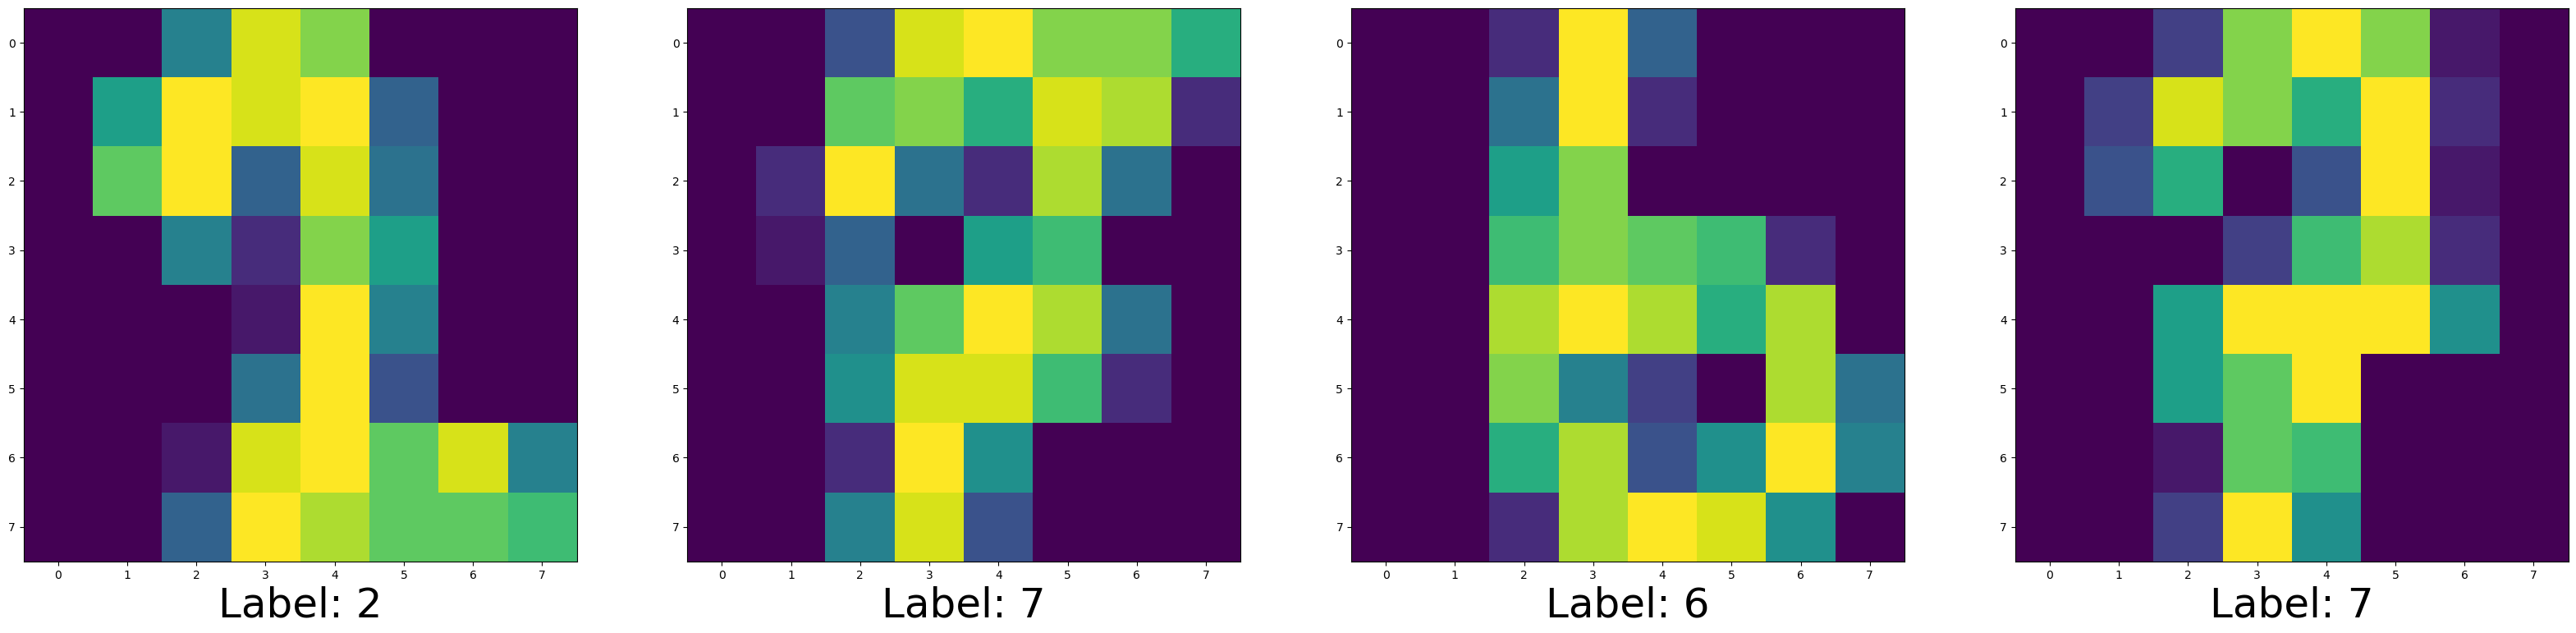

In [5]:
n = 4
random_indices = [random.randint(0, len(digits.images)) for i in range(n)]

fig, axes = plt.subplots(1, n, figsize=(40*1, 40*n))

for _col, sample_idx in enumerate(random_indices):
    img, lbl = digits.images[sample_idx], digits.target[sample_idx]
    axes[_col].imshow(img)
    axes[_col].set_xlabel(f"Label: {lbl}", fontsize=36) 

plt.show()

In [10]:
def train_test_split(data, target, fraction):
    ########  TODO ########################
    # 1. Shuffle the data and targets
    # 2. Split it based on the fraction
    # 3. Return (train_1, target_1, train_2, target_2of two splits
	# You `cannot` use train_test_split function provided by some library.
	# You are however welcome to look into their source code to see how one does this if it helps.
    
    indices = list(range(0, len(data)))
    np.random.shuffle(indices)
    data = data[indices]
    target = target[indices]
    split_idx = int(len(data) * fraction)
    train_1 = data[:split_idx]
    target_1 = target[:split_idx]
    train_2 = data[split_idx:]
    target_2 = target[split_idx:]
    #######################################
    return train_1, target_1, train_2, target_2

In [16]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data)
print(data.shape)
print(digits.target)
print(digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


In [17]:
# Split data into 50% train and 50% test subsets
X_trainval, y_trainval, X_test, y_test = \
    train_test_split( 
        # TODO First separate the test samples!
        # Side-note: In a real benchmark people often use the same official test-set so that they can
        # compare their numbers to each other. In this assignment however we simply create our own
        # randomly selectd test set from the data.
        data, digits.target, 0.5
    )

# Now Split the TRAIN data into 80% train and 20% validation subsets
X_train, y_train, X_val, y_val = \
    train_test_split( 
        # TODO Now separate the cross-validation samples!
        X_trainval, y_trainval, 0.8
    )

In [18]:
print(f"{X_train.shape=} {y_train.shape=}")
print(f"{X_val.shape=} {y_val.shape=}")
print(f"{X_test.shape=} {y_test.shape=}")

X_train.shape=(718, 64) y_train.shape=(718,)
X_val.shape=(180, 64) y_val.shape=(180,)
X_test.shape=(899, 64) y_test.shape=(899,)


In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.1)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the val subset
output = clf.decision_function(X_val)

print(f"Model output has shape {output.shape}")

########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = output.argmax(axis=1)
########################################

Model output has shape (180, 10)


In [23]:
def accuracy_top1(predictions, targets):
    ########  TODO ########################
    # Return the mean accuracy (range from [0, 100])
    top1_acc = np.mean(predictions == targets) * 100
    return top1_acc # replace with accuracy
    ########################################

In [32]:
print(f"Cross-validation accuracy is {accuracy_top1(preds, y_val):0.3f}")

Cross-validation accuracy is 72.222


Go back to the previous cell and try different gamma values [0.1 0.01 0.001 0.0001 0.00001] for the classifier configuration and report results for each over the `val` set. Simply replace the written 0.1 value.


Please write down your tested values and results here. Which gamma value worked best on the val set?

### ANSWER:

| Value    | Result |
|:---------|-------:|
| 0.1      | 12.778 |
| 0.01     | 58.889 |
| 0.001    | 97.778 |
| 0.0001   | 93.333 |
| 0.00001  | 72.220 |

**Conclusion:**  
`gamma = 0.001` worked best on the validation set.

In [33]:
# Now insert your best gamma value and train the model again.
best_gamma_value = 0.001 # Replace this with your best finding!

clf = svm.SVC(gamma=best_gamma_value)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
output = clf.decision_function(X_test)

########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = output.argmax(axis=1)
########################################

In [34]:
print(f"Final test accuracy is {accuracy_top1(preds, y_test):0.3f}")

Final test accuracy is 98.665


In [54]:
def softmax(x):
    """
    Args       x: Numpy array of shape (N, num_classes) with real values
    Returns    Numpy array of shape (N, num_classes) with softmax probability scores
    """
    ########  TODO ########################
    exp_x_vals = np.exp(x) # make all predictions exponential
    total_exp_x_vals = np.sum(exp_x_vals, axis=1, keepdims=True) # calculate sum to normalize
    softmax_scores = exp_x_vals / total_exp_x_vals
    
    assert(softmax_scores.shape == x.shape)
    assert(sum(softmax_scores[0]) == 1.0)
    # return per-sample softmax scores
    return softmax_scores
    ########################################

########  TODO ########################
# Using the softmax function defined above, convert (N, 10) outputs 
#to (N,) Softmax probabilities for the predicted class
scores = softmax(output).max(axis=1)
########################################

Visualize some of the test predictions!

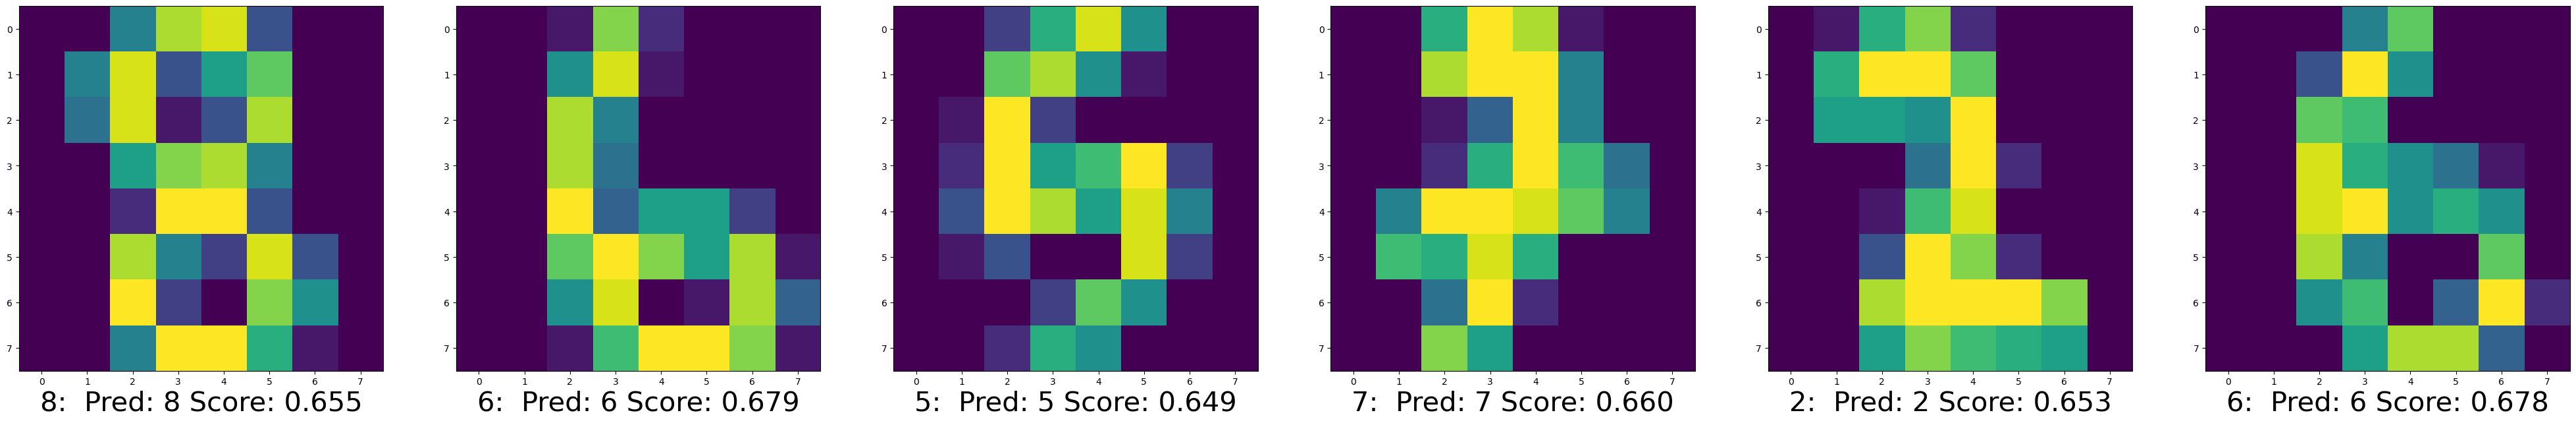

In [55]:
n = 6
random_indices = [random.randint(0, len(X_test)) for i in range(n)]
fig, axes = plt.subplots(1, n, figsize=(50*1, 50*n))


for _col, sample_idx in enumerate(random_indices):
    img = X_test[sample_idx].reshape((8, 8))
    lbl = y_test[sample_idx]

    axes[_col].imshow(img)
    axes[_col].set_xlabel(
        f"{lbl}:  Pred: {preds[sample_idx]} Score: {scores[sample_idx]:0.3f}",
        fontsize=30
    )

plt.show()